# Understanding K-Means Clustering in Machine Learning

This notebook is for the blog: [Understanding K-Means Clustering in Machine Learning](https://derekzhouai.github.io/posts/understanding-kmeans/)

In [1]:
import numpy as np

def kmeans(X: np.ndarray, k: int, max_iters: int = 100, tol: float = 1e-4) -> tuple[np.ndarray, np.ndarray]:
    """
    Perform K-Means clustering.
    Args:
        X (np.ndarray): Input data of shape (n_samples, n_features).
        k (int): Number of clusters.
        max_iters (int, optional): Maximum number of iterations. Defaults to 100.
        tol (float, optional): Tolerance for convergence. Defaults to 1e-4.
    Returns:
        tuple[np.ndarray, np.ndarray]: Final cluster centers and labels.
    """
    # Randomly initialize cluster centers
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Compute distances from points to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Recalculate centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids

    return centroids, labels

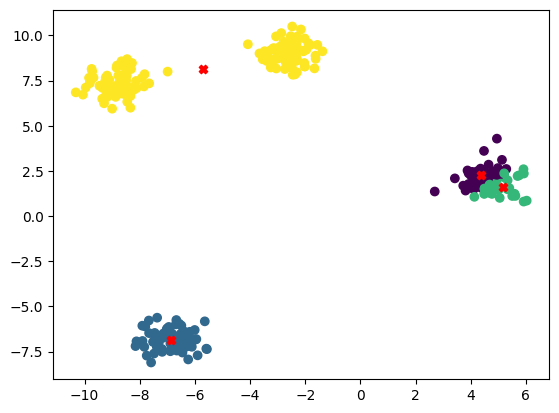

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Run KMeans
centroids, labels = kmeans(X, k=4)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.show()